In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
from scipy.stats import ttest_ind

In [2]:
from scipy.stats import mannwhitneyu

def mwu_test(controle, tratamento):
    stat, p = stats.mannwhitneyu(controle, tratamento)
    print('t=%.3f, p=%.5f' % (stat, p))
    if p <= 0.0001:
        return "****"
    elif p <= 0.001:
        return "***"
    elif p <= 0.01:
        return "**"
    elif p <= 0.05:
        return "*"
    return "NS"

def teste_normalidade(x):
    # Plotting the histogram with KDE line
    plt.subplot(1, 2, 1)
    plt.rcParams["figure.figsize"] = (8, 4)
    ax = sns.histplot(x, kde=True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='x', width=0.5, color='gray')
    ax.tick_params(axis='y', width=0.5, color='gray')

    # Plotting the QQ-plot
    plt.subplot(1, 2, 2)
    pg.qqplot(x, dist='norm')
    
    # Calculating skewness and kurtosis
    print('Sample size:', len(x))
    print('Skewness:', stats.skew(x), '(The farther from zero, the less normal)')
    print('Kurtosis:', stats.kurtosis(x))

    # Shapiro-Wilk test (may not work well with many identical values)
    W, p = stats.shapiro(x)
    print('Shapiro-Wilk: W={0}, p={1}'.format(W, p), '(if p > 0.05, it is normal)')

    # Kolmogorov-Smirnov test
    D, p = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()), N=len(x))
    print('Kolmogorov-Smirnov: D={0}, p={1}'.format(D, p), '(if p > 0.05, it is normal)')

    # Anderson-Darling test
    ad_stat, ad_critical, ad_theoretical = stats.anderson(x, dist='norm')
    print('Anderson-Darling: T={0}, p(0.05)={1}'.format(ad_stat, ad_critical[2]), '(if p > 0.05, it is normal)')
    print('Anderson-Darling critical values:', ad_critical)
    print('Anderson-Darling percentages:', ad_theoretical)

In [3]:
# data

df_sifak = pd.read_csv('data/findmaxima_results.tsv', sep='\t')


In [4]:
df_sifak.head()

,label,max_9000,sum_9000
0,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,38,373
1,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,16,192
2,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,26,226
3,CT-scramble-h2ax-647-ku80-564-dapi-02_Out_Chan...,2,51
4,CT-scramble-h2ax-647-ku80-564-dapi-02_Out_Chan...,1,54


In [5]:
def g(df_sifak):
    df_sifak['tto'] = df_sifak['label'].apply(lambda x: 
        'ct' if x.startswith('CT-scramble') else 
        'ct_sifak' if x.startswith('CT-siFAK') else 
        'dox_sifak' if x.startswith('Dox-siFAK') else 
        'dox')
    return df_sifak

df_sifak = g(df_sifak.copy())


In [6]:
df_sifak

,label,max_9000,sum_9000,tto
0,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,38,373,ct
1,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,16,192,ct
2,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,26,226,ct
3,CT-scramble-h2ax-647-ku80-564-dapi-02_Out_Chan...,2,51,ct
4,CT-scramble-h2ax-647-ku80-564-dapi-02_Out_Chan...,1,54,ct
...,...,...,...,...
171,Dox-siFAK-h2ax-647-ku80-564-dapi-16_Out_Channe...,60,579,dox_sifak
172,Dox-siFAK-h2ax-647-ku80-564-dapi-16_Out_Channe...,21,408,dox_sifak
173,Dox-siFAK-h2ax-647-ku80-564-dapi-17_Out_Channe...,45,404,dox_sifak
174,Dox-siFAK-h2ax-647-ku80-564-dapi-17_Out_Channe...,80,375,dox_sifak


## Medidas descritivas

In [7]:
df_sifak.groupby(['tto'])['max_9000'].describe()

,count,mean,std,min,25%,50%,75%,max
tto,,,,,,,,
ct,49.0,19.040816,20.240182,1.0,1.00,16.0,31.00,75.0
ct_sifak,51.0,10.450980,13.736541,1.0,1.00,4.0,13.50,59.0
dox,36.0,78.388889,64.543796,1.0,10.50,79.0,126.25,206.0
dox_sifak,40.0,76.400000,62.673268,1.0,23.25,66.0,124.75,207.0


In [8]:
df_sifak.groupby(['tto'])['sum_9000'].describe()

,count,mean,std,min,25%,50%,75%,max
tto,,,,,,,,
ct,49.0,168.530612,141.902123,3.0,32.00,182.0,235.0,505.0
ct_sifak,51.0,129.686275,120.412041,11.0,38.50,99.0,164.5,528.0
dox,36.0,435.416667,235.250307,88.0,235.75,399.0,619.0,1028.0
dox_sifak,40.0,462.250000,205.452066,78.0,310.00,436.5,590.0,984.0


## Separação em grupos e medianas

In [9]:
dox_gh2ax_count = df_sifak[df_sifak['tto']=='dox']['max_9000']
ct_gh2ax_count = df_sifak[df_sifak['tto']=='ct']['max_9000']
sifakdox_gh2ax_count = df_sifak[df_sifak['tto']=='dox_sifak']['max_9000']
sifakct_gh2ax_count = df_sifak[df_sifak['tto']=='ct_sifak']['max_9000']

print("Média de CT:",ct_gh2ax_count.median())
print("Média de CT sifak:",sifakct_gh2ax_count.median())
print("Média de Dox:",dox_gh2ax_count.median())
print("Média de Dox sifak:",sifakdox_gh2ax_count.median())

Média de CT: 16.0
Média de CT sifak: 4.0
Média de Dox: 79.0
Média de Dox sifak: 66.0


## normalidade

Sample size: 49
Skewness: 1.018839036115679 (The farther from zero, the less normal)
Kurtosis: 0.207627806503897
Shapiro-Wilk: W=0.8436900973320007, p=1.2468308341340162e-05 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.2082496958722484, p=0.024246143687638444 (if p > 0.05, it is normal)
Anderson-Darling: T=2.538146038936439, p(0.05)=0.735 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.538 0.612 0.735 0.857 1.019]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


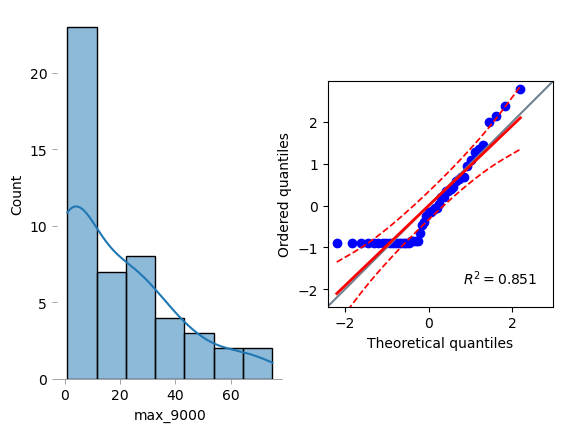

In [10]:
teste_normalidade(ct_gh2ax_count)

Sample size: 51
Skewness: 1.8046736540630022 (The farther from zero, the less normal)
Kurtosis: 2.6847961539945473
Shapiro-Wilk: W=0.7259447574615479, p=1.9934315531600078e-08 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.2457208797564141, p=0.0033806776817254525 (if p > 0.05, it is normal)
Anderson-Darling: T=5.03730164022646, p(0.05)=0.736 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.539 0.614 0.736 0.859 1.022]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


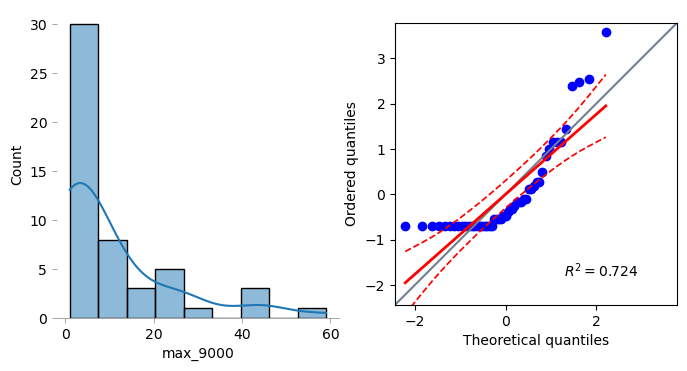

In [11]:
teste_normalidade(sifakct_gh2ax_count)

Sample size: 36
Skewness: 0.3444155039285046 (The farther from zero, the less normal)
Kurtosis: -1.0885191901729665
Shapiro-Wilk: W=0.9159069061279297, p=0.009563758037984371 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.13478379941631835, p=0.4884518540167373 (if p > 0.05, it is normal)
Anderson-Darling: T=0.8856530632433817, p(0.05)=0.721 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.528 0.601 0.721 0.841 1.   ]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


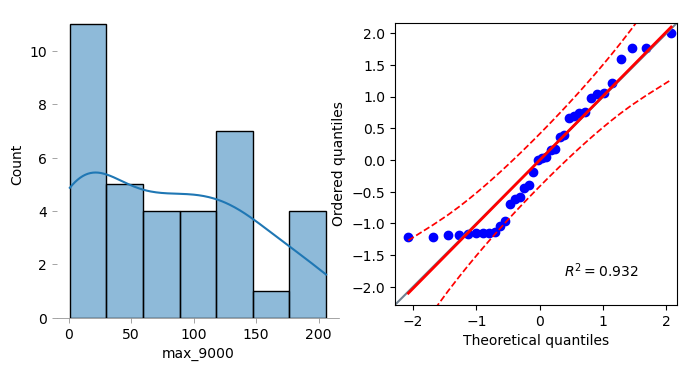

In [12]:
teste_normalidade(dox_gh2ax_count)

Sample size: 40
Skewness: 0.5166764632155703 (The farther from zero, the less normal)
Kurtosis: -0.9423310199372636
Shapiro-Wilk: W=0.9169032573699951, p=0.00616238871589303 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.11447562912156378, p=0.6295955992758601 (if p > 0.05, it is normal)
Anderson-Darling: T=0.9946323473347007, p(0.05)=0.726 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.531 0.605 0.726 0.847 1.007]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


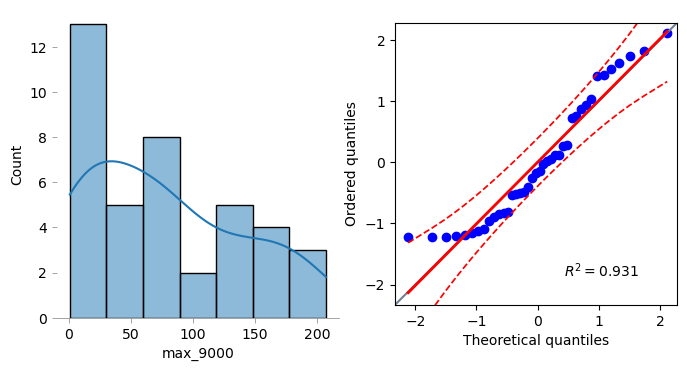

In [13]:
teste_normalidade(sifakdox_gh2ax_count)

## Não normal

In [14]:
# CT vs CT SiFAK
mwu_test(ct_gh2ax_count,sifakct_gh2ax_count)

t=1520.500, p=0.05606


'NS'

In [15]:
# dox vs dox SiFAK
mwu_test(dox_gh2ax_count,sifakdox_gh2ax_count)

t=732.000, p=0.90474


'NS'

## Comparações gráficas

<Figure size 1920x1200 with 0 Axes>

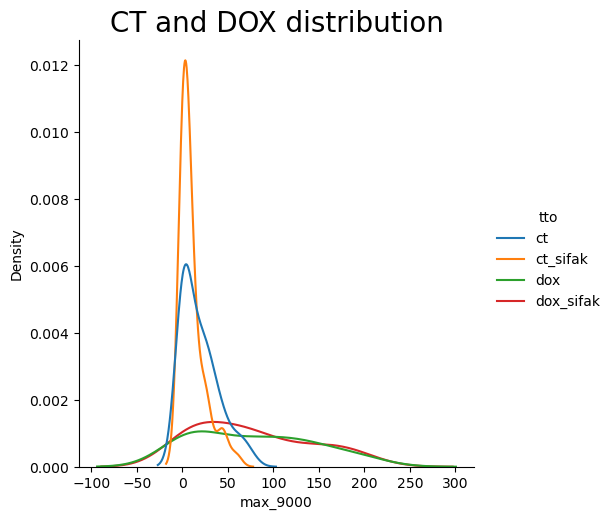

In [16]:
ratio = 12
plt.figure(figsize=(ratio*1.6,ratio))
# colors = ['#2596be', '#be4d25']

sns.displot(data=df_sifak, x='max_9000', hue='tto',kind='kde')
sns.despine()
plt.title("CT and DOX distribution", size=20);

<Axes: xlabel='tto', ylabel='max_9000'>

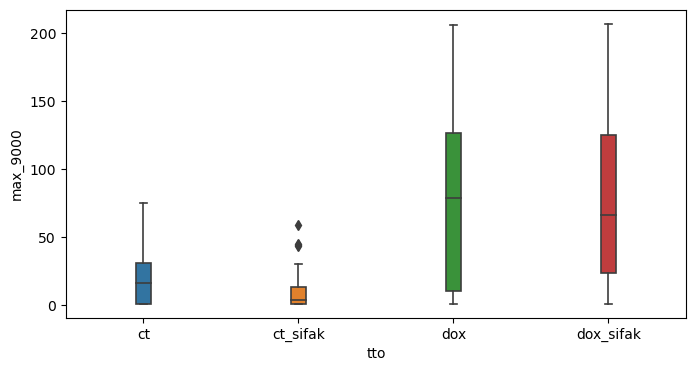

In [17]:
sns.boxplot(data=df_sifak, y='max_9000', x='tto', width=.1, linewidth=1.2)

In [18]:
df_sifak

,label,max_9000,sum_9000,tto
0,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,38,373,ct
1,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,16,192,ct
2,CT-scramble-h2ax-647-ku80-564-dapi-01_Out_Chan...,26,226,ct
3,CT-scramble-h2ax-647-ku80-564-dapi-02_Out_Chan...,2,51,ct
4,CT-scramble-h2ax-647-ku80-564-dapi-02_Out_Chan...,1,54,ct
...,...,...,...,...
171,Dox-siFAK-h2ax-647-ku80-564-dapi-16_Out_Channe...,60,579,dox_sifak
172,Dox-siFAK-h2ax-647-ku80-564-dapi-16_Out_Channe...,21,408,dox_sifak
173,Dox-siFAK-h2ax-647-ku80-564-dapi-17_Out_Channe...,45,404,dox_sifak
174,Dox-siFAK-h2ax-647-ku80-564-dapi-17_Out_Channe...,80,375,dox_sifak


In [19]:
sifak_agg = df_sifak.groupby('tto').agg({'max_9000': [np.mean, np.std, 'sem', 'count']})
sifak_agg

max_9000                            
                mean        std        sem count
tto                                             
ct         19.040816  20.240182   2.891455    49
ct_sifak   10.450980  13.736541   1.923500    51
dox        78.388889  64.543796  10.757299    36
dox_sifak  76.400000  62.673268   9.909514    40

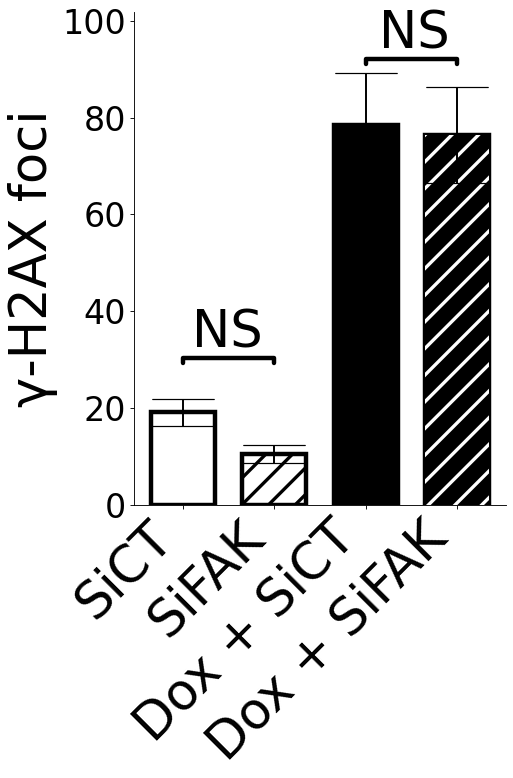

In [20]:
# dados

grupos = [ct_gh2ax_count, sifakct_gh2ax_count, dox_gh2ax_count, sifakdox_gh2ax_count]
means = sifak_agg['max_9000']['mean']
erros = sifak_agg['max_9000']['sem']

# Set the figure filename
figure_name = 'sifak gh2ax sifak findmaxima'

cores_barras = ['white', 'white', 'black', 'black']
cor_envolta = ["black", 'white'] #cor da linha envolta das barras
espessura_volta = 4   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'γ-H2AX foci' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['SiCT', 'SiFAK', 'Dox + SiCT', 'Dox + SiFAK'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

# remover normalização
means_normalizado = means
erros_normalizado = erros

def traco(text,X,Y,barhight,texthight,xtext):
    x = (X[0]+X[1])/2
    y = 1.295* max(Y[0], Y[1])+barhight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x+xtext # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(means_normalizado)+texthight), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

plt.rcParams['hatch.linewidth'] = 3 # regula a espessura das linhas dentro das barras

x = [1, 2, 3, 4]  # localização da barra
width = 0.7# espessura da barra

fig, ax = plt.subplots(figsize=(6,8), dpi=80)
barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= cores_barras[0] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= cores_barras[1] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= cores_barras[2] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= cores_barras[3] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[3])

barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= 'None', hatch='',edgecolor= cor_envolta, linewidth= 0, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= 'None', hatch='/'*1,edgecolor= cor_envolta, linewidth= 0, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= 'None', hatch='',edgecolor= cor_envolta[1], linewidth= 0, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= 'None', hatch='/'*1,edgecolor= cor_envolta[1], linewidth= 0, label= labels[3])

# chamando def para os traços

traco("NS",x[0:2],(means_normalizado[0],means_normalizado[1]),0,-.1,-.4)
# traco(ttesting(grupos[1],grupos[2]), (x[1], x[2]), (means_normalizado[1],means_normalizado[2]), 1, -1,-.55)
traco("NS",x[2:4],(means_normalizado[2],means_normalizado[3]),-15,0,-.35)
# traco(ttesting(grupos[0],grupos[3]), (x[0], x[3]), (means_normalizado[0],means_normalizado[3]), 2, 2.5,-.5)

plt.ylim(0,1.3* max(means_normalizado))
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
plt.yticks(fontsize=Tamanho_ticks_Y)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X, rotation=45, ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the figure in PDF, JPEG, and PNG formats
plt.savefig(f'{figure_name}.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{figure_name}.jpeg', bbox_inches='tight', dpi=300)
plt.savefig(f'{figure_name}.png', bbox_inches='tight', dpi=300, transparent=True)


plt.show()